# <center><u>Machine Learning - Price Prediction of a Phone</u></center>

## Import 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Description


<code>ratings</code> -The average rating given by users (numeric: between 2.9 and 5 ) 
    
    
<code>price</code> - The price of the phone in India (in dollars) (numeric: between 100 and 510)  
        
    
<code>brand</code> - The brand of the phone (nominal: 'samsung', 'redmi', 'vivo', 'oppo', 'oneplus', 'realme', 'infinix', 'tecno', 'motorola', 'mi', 'xiaomi')  
        
    
<code>color</code> - The color of the phone (nominal: 'black', 'blue', 'green', 'white', 'grey', 'gold, 'silver', 'purple') 
        
    
<code>processor_type</code> - The type of processor of the phone (nominal: 'mediatek', 'qualcomm', 'intel', 'samsung')  
    
    
<code>resolution</code> - The resolution of the phone (ordinal: 'HD', 'Full HD', '2K', '4K')
    
    
<code>size</code> - The phone's size in inches (numeric: between 5.2 and 7.6)  
    
    
<code>storage</code> - The storage capacity of the phone in GB (nominal: '32GB', '64GB', '128GB', '256GB')  

## Machine Learning process

### 3.1.Preprocessing Pipeline

In [7]:
df = pd.read_csv('data/mobile_characteristics_processed.csv')

In [8]:
df.columns

Index(['ratings', 'price', 'brand', 'color', 'storage', 'processor_type',
       'resolution', 'size'],
      dtype='object')

In [11]:
df.head(2)

,ratings,price,brand,color,storage,processor_type,resolution,size
0,4.2,291,redmi,black,128GB,mediatek,Full HD,6.7
1,4.5,255,oppo,green,128GB,mediatek,Full HD,6.5


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn import set_config; set_config(display='diagram')

We separate our X from our Y.

In [152]:
X_price = df.drop(columns=['price'])

y = df['price']

Setting up lists to sort our variables based on their description.

In [89]:
ordinal_cols = ['storage','resolution']
categorical_cols = ['color', 'processor_type', 'brand']

numerical_cols = ['size', 'ratings']

###### Ordinal Pipeline

In [90]:
# Specify the custom categories for 'storage' and 'resolution'
custom_categories = {
    'storage': ['32GB', '64GB', '128GB', '256GB'],
    'resolution': ['HD', 'Full HD', '2K', '4K']
}

storage_cat = [['32GB', '64GB', '128GB', '256GB']]
resolution_cat = [['HD', 'Full HD', '2K', '4K']]


ordinal_transformer = make_column_transformer(
    (OrdinalEncoder(categories=storage_cat), ['storage']),
    (OrdinalEncoder(categories=resolution_cat), ['resolution'])
)

In [93]:
ordi = ordinal_transformer.fit_transform(X_price[ordinal_cols])
test_ordi = pd.DataFrame(ordi,columns=ordinal_transformer.get_feature_names_out())

In [94]:
test_ordi

,ordinalencoder-1__storage,ordinalencoder-2__resolution
0,2.0,1.0
1,2.0,1.0
2,1.0,1.0
3,3.0,1.0
4,1.0,1.0
...,...,...
1373,3.0,2.0
1374,2.0,1.0
1375,1.0,1.0
1376,2.0,1.0


###### Categorical Pipeline

In [194]:
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse=False))

In [195]:
cat = categorical_pipeline.fit_transform(X_price[categorical_cols])
test_cat = pd.DataFrame(cat,columns=categorical_pipeline.get_feature_names_out())

In [74]:
test_cat

,color_black,color_blue,color_gold,color_green,color_grey,color_purple,color_silver,color_white,processor_type_intel,processor_type_mediatek,...,brand_mi,brand_motorola,brand_oneplus,brand_oppo,brand_realme,brand_redmi,brand_samsung,brand_tecno,brand_vivo,brand_xiaomi
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1374,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1376,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Numerical Pipeline

In [80]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                   StandardScaler())

In [81]:
num = numerical_pipeline.fit_transform(X_price[numerical_cols])
test_num = pd.DataFrame(num,columns=numerical_pipeline.get_feature_names_out())

In [82]:
test_num

,size,ratings
0,0.785351,-0.479971
1,-0.035129,1.520231
2,-0.445370,-0.479971
3,-0.445370,-1.146705
4,0.375111,0.186763
...,...,...
1373,0.785351,-0.479971
1374,-0.035129,-1.146705
1375,-0.035129,0.186763
1376,-0.035129,-2.480173


###### Preprocessing Pipeline

In [97]:
preprocess = make_column_transformer((ordinal_transformer, ordinal_cols),
                                     (categorical_pipeline, categorical_cols),
                                     (numerical_pipeline, numerical_cols),
                                     remainder='passthrough')
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('columntransformer',
                                 ColumnTransformer(transformers=[('ordinalencoder-1',
                                                                  OrdinalEncoder(categories=[['32GB',
                                                                                              '64GB',
                                                                                              '128GB',
                                                                                              '256GB']]),
                                                                  ['storage']),
                                                                 ('ordinalencoder-2',
                                                                  OrdinalEncoder(categories=[['HD',
                                                                                              'Full '
                                                                                              'HD',
                                                                                              '2K',
                                                                                              '4K']]),
                                                                  ['resolution'])]),
                                 ['storage', 'resolution']),
                                ('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 ['color', 'processor_type', 'brand']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['size', 'ratings'])])

In [99]:
test_dataf = preprocess.fit_transform(X_price)

X_processed  = pd.DataFrame(test_dataf, columns=preprocess.get_feature_names_out())

### 3.2. Model Selection

###### Model reg
First, we will attempt to predict the exact grade using a linear regression model.

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Créez une liste des modèles que vous souhaitez tester (max 5)
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    SVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor()
]

# Créez le GridSearchCV pour tester les modèles
results = []
for model in models:
    grid_search = GridSearchCV(model, {}, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_processed, y)
    
    result = {
        'model_name': model.__class__.__name__,
        'best_score': grid_search.best_score_
    }
    results.append(result)

# Affichez les résultats
for result in results:
    print(f"Model: {result['model_name']}")
    print(f"Best Score (neg_mean_squared_error): {result['best_score']}")
    print("=" * 50)

Model: LinearRegression
Best Score (neg_mean_squared_error): -3534.4477357556652
Model: Ridge
Best Score (neg_mean_squared_error): -3533.2821560665775
Model: Lasso
Best Score (neg_mean_squared_error): -3640.700740950285
Model: SVR
Best Score (neg_mean_squared_error): -5393.83493868353
Model: RandomForestRegressor
Best Score (neg_mean_squared_error): -2363.024616364274
Model: GradientBoostingRegressor
Best Score (neg_mean_squared_error): -2622.0222932851916
Model: KNeighborsRegressor
Best Score (neg_mean_squared_error): -3241.0085076152836


In [115]:
model_reg = make_pipeline(preprocess, RandomForestRegressor())
model_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('columntransformer',
                                                  ColumnTransformer(transformers=[('ordinalencoder-1',
                                                                                   OrdinalEncoder(categories=[['32GB',
                                                                                                               '64GB',
                                                                                                               '128GB',
                                                                                                               '256GB']]),
                                                                                   ['storage']),
                                                                                  ('ordinalencoder-2',
                                                                                   OrdinalEncoder(categories=[['HD',
                                                                                                               'Full '
                                                                                                               'HD',
                                                                                                               '2K',
                                                                                                               '4K']]),
                                                                                   ['resolution'])]),
                                                  ['storage', 'res...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['color', 'processor_type',
                                                   'brand']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['size', 'ratings'])])),
                ('randomforestregressor', RandomForestRegressor())])

Train Test Split for both y

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_price, y, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(1102, 7) (276, 7)
(1102,) (276,)


GridSearchCV 

In [ ]:
params = {
    'randomforestregressor__n_estimators' : [100, 200, 500],
    'randomforestregressor__max_depth' : [None, 5, 10],
    'randomforestregressor__min_samples_split' : [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

grid_rfr = GridSearchCV(model_reg, param_grid=params, cv=4)

In [ ]:
grid_rfr.fit(X_train, y_train)

In [116]:
grid_rfr.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 5,
 'randomforestregressor__n_estimators': 200}

In [111]:
grid_rfr.score(X_test,y_test)

0.6729210622438726

### 3.3.Model

In [173]:
model_reg = make_pipeline(
    preprocess,
    RandomForestRegressor(n_estimators=200,
                          min_samples_leaf=2,
                          min_samples_split=5,
                          max_depth=None))
model_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('columntransformer',
                                                  ColumnTransformer(transformers=[('ordinalencoder-1',
                                                                                   OrdinalEncoder(categories=[['32GB',
                                                                                                               '64GB',
                                                                                                               '128GB',
                                                                                                               '256GB']]),
                                                                                   ['storage']),
                                                                                  ('ordinalencoder-2',
                                                                                   OrdinalEncoder(categories=[['HD',
                                                                                                               'Full '
                                                                                                               'HD',
                                                                                                               '2K',
                                                                                                               '4K']]),
                                                                                   ['resolution'])]),
                                                  ['storage', 'resolution']),
                                                 ('pipeline-1'...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['processor_type', 'brand']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['size'])])),
                ('randomforestregressor',
                 RandomForestRegressor(min_samples_leaf=2, min_samples_split=5,
                                       n_estimators=200))])

In [119]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, train_sizes, cv, scoring):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/cassienbabey/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

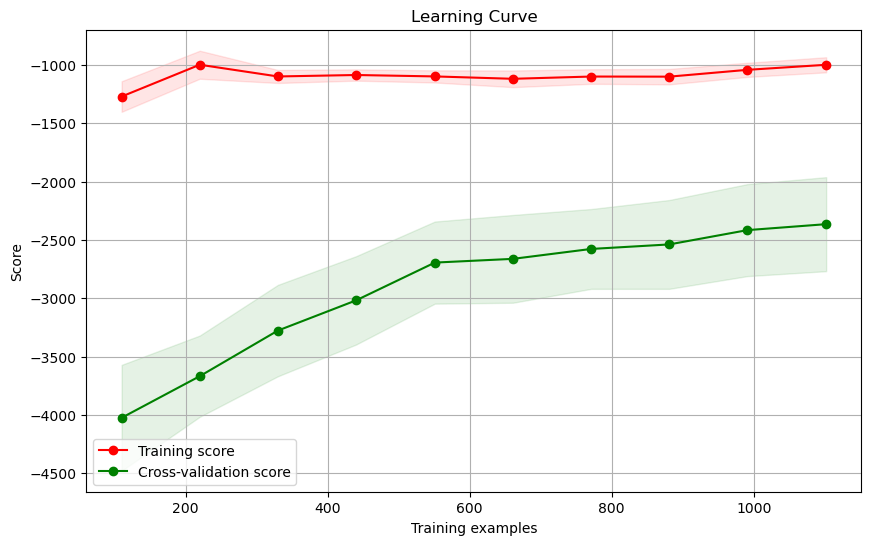

In [123]:
plot_learning_curve(model_reg, X_price, y,train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error') 

### 3.4. Features selection

In [126]:
data_processed = pd.concat([X_processed, y], axis=1)
data_processed

,columntransformer__ordinalencoder-1__storage,columntransformer__ordinalencoder-2__resolution,pipeline-1__color_black,pipeline-1__color_blue,pipeline-1__color_gold,pipeline-1__color_green,pipeline-1__color_grey,pipeline-1__color_purple,pipeline-1__color_silver,pipeline-1__color_white,...,pipeline-1__brand_oppo,pipeline-1__brand_realme,pipeline-1__brand_redmi,pipeline-1__brand_samsung,pipeline-1__brand_tecno,pipeline-1__brand_vivo,pipeline-1__brand_xiaomi,pipeline-2__size,pipeline-2__ratings,price
0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.785351,-0.479971,291
1,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.035129,1.520231,255
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.445370,-0.479971,159
3,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.445370,-1.146705,267
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375111,0.186763,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.785351,-0.479971,364
1374,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.035129,-1.146705,194
1375,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.035129,0.186763,145
1376,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.035129,-2.480173,367


##### Selection based on correlations

Selection based on correlations involves choosing variables that have the highest correlations (positive or negative) with the target variable.

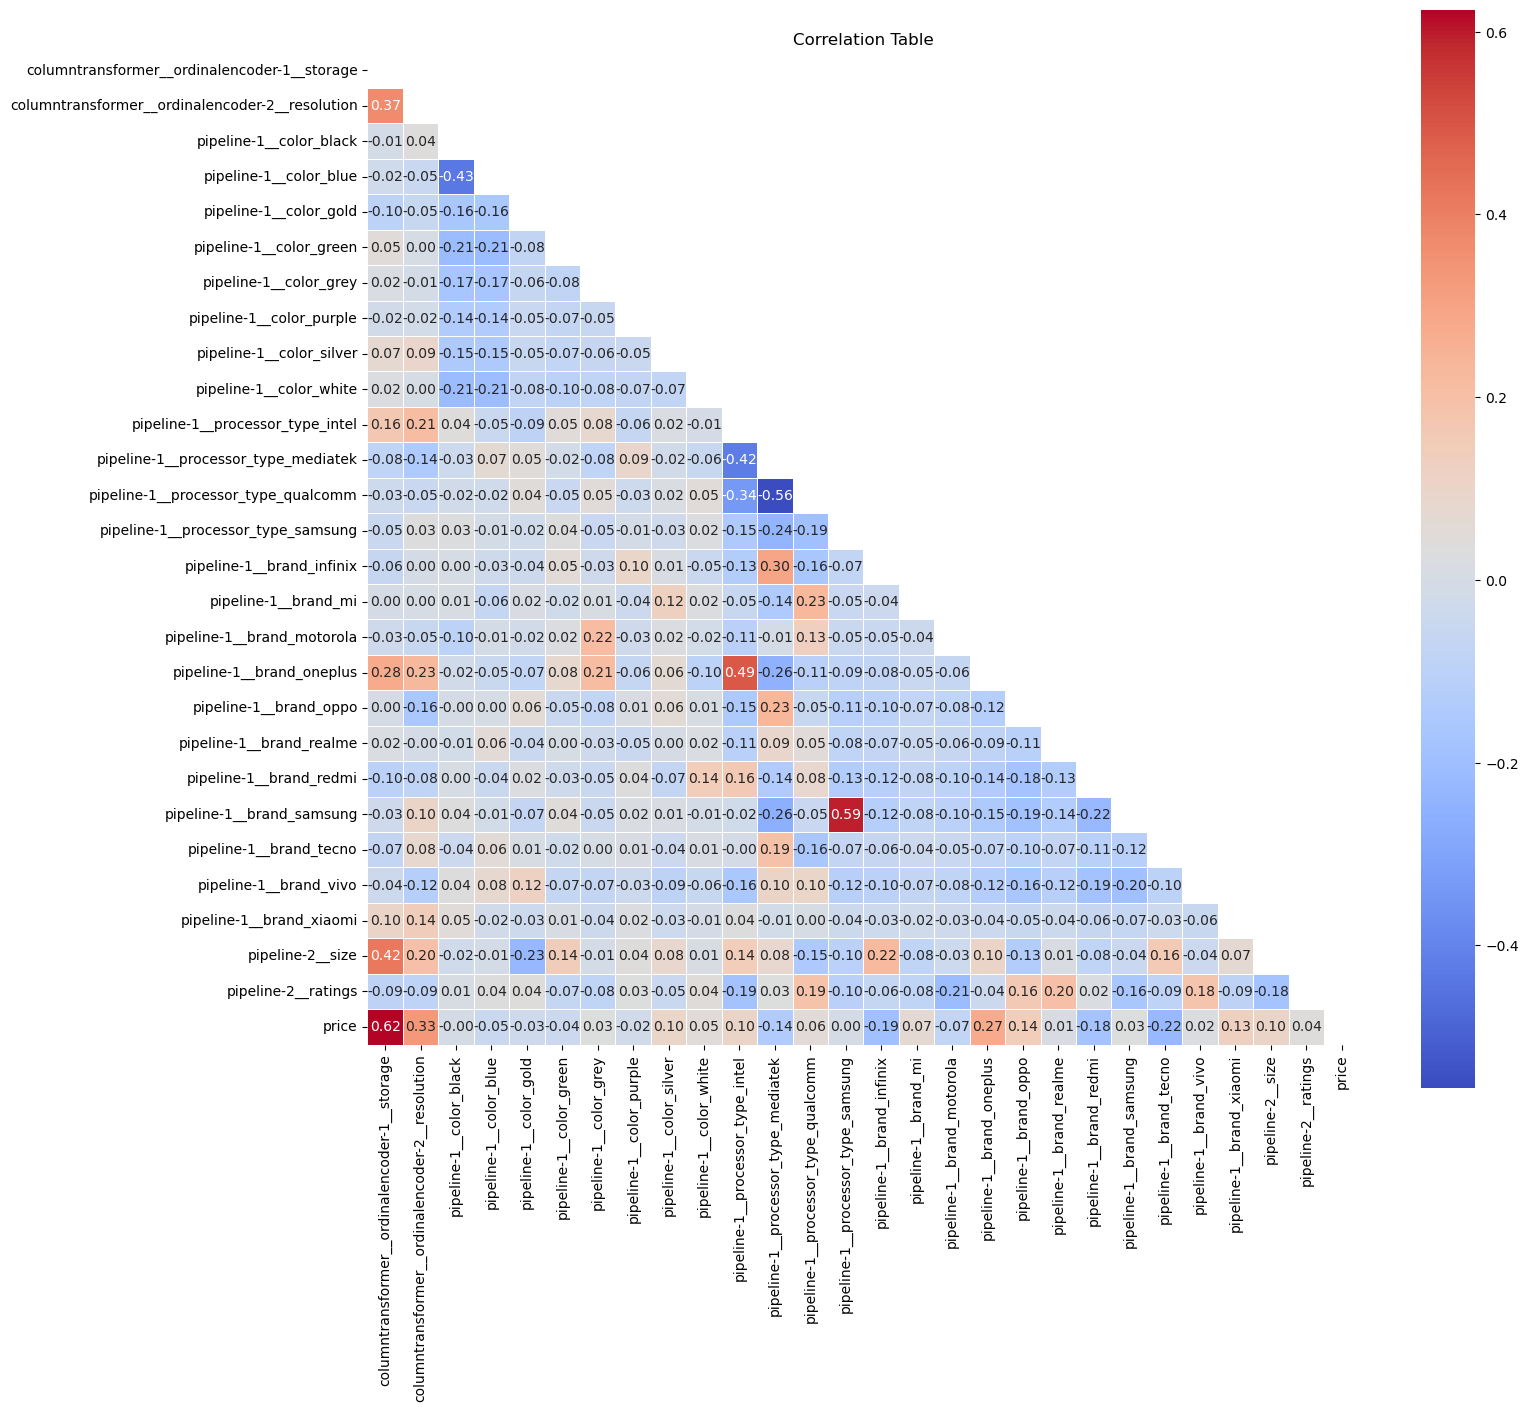

In [127]:
correlation_matrix = data_processed.corr()

# Create a mask for the upper half of the correlation table
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation table as a heatmap with the upper half masked
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True,
            mask=mask)
plt.title('Correlation Table')
plt.show()

In [132]:
data_processed.corr()['price'].drop('price').sort_values(ascending=False)

columntransformer__ordinalencoder-1__storage       0.624320
columntransformer__ordinalencoder-2__resolution    0.331181
pipeline-1__brand_oneplus                          0.274104
pipeline-1__brand_oppo                             0.143296
pipeline-1__brand_xiaomi                           0.125905
pipeline-1__processor_type_intel                   0.103471
pipeline-2__size                                   0.103383
pipeline-1__color_silver                           0.095339
pipeline-1__brand_mi                               0.066754
pipeline-1__processor_type_qualcomm                0.056226
pipeline-1__color_white                            0.051733
pipeline-2__ratings                                0.042849
pipeline-1__brand_samsung                          0.033982
pipeline-1__color_grey                             0.031796
pipeline-1__brand_vivo                             0.024906
pipeline-1__brand_realme                           0.013973
pipeline-1__processor_type_samsung      

We apply a threshold of 0.1 to remove variables with very weak correlations and obtain a more focused view of the explanatory variables :

In [134]:
correlations_above_threshold = correlation_matrix[abs(correlation_matrix['price']) > 0.1]
sorted_correlations = correlations_above_threshold['price'].sort_values(ascending=False)
sorted_correlations

price                                              1.000000
columntransformer__ordinalencoder-1__storage       0.624320
columntransformer__ordinalencoder-2__resolution    0.331181
pipeline-1__brand_oneplus                          0.274104
pipeline-1__brand_oppo                             0.143296
pipeline-1__brand_xiaomi                           0.125905
pipeline-1__processor_type_intel                   0.103471
pipeline-2__size                                   0.103383
pipeline-1__processor_type_mediatek               -0.138636
pipeline-1__brand_redmi                           -0.179882
pipeline-1__brand_infinix                         -0.191876
pipeline-1__brand_tecno                           -0.223111
Name: price, dtype: float64

It seems that 'ratings' and 'color' do not provide much information about the price. Therefore, we will remove them and create a new pipeline :

In [197]:
ordinal_cols = ['storage','resolution']
categorical_cols = ['processor_type', 'brand']

numerical_cols = ['size']

preprocess = make_column_transformer((ordinal_transformer, ordinal_cols),
                                     (categorical_pipeline, categorical_cols),
                                     (numerical_pipeline, numerical_cols),
                                     remainder='drop')
preprocess

ColumnTransformer(transformers=[('columntransformer',
                                 ColumnTransformer(transformers=[('ordinalencoder-1',
                                                                  OrdinalEncoder(categories=[['32GB',
                                                                                              '64GB',
                                                                                              '128GB',
                                                                                              '256GB']]),
                                                                  ['storage']),
                                                                 ('ordinalencoder-2',
                                                                  OrdinalEncoder(categories=[['HD',
                                                                                              'Full '
                                                                                              'HD',
                                                                                              '2K',
                                                                                              '4K']]),
                                                                  ['resolution'])]),
                                 ['storage', 'resolution']),
                                ('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 ['processor_type', 'brand']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['size'])])

In [198]:
test_dataf = preprocess.fit_transform(X_price)

X_processed  = pd.DataFrame(test_dataf, columns=preprocess.get_feature_names_out())

In [199]:
X_processed

,columntransformer__ordinalencoder-1__storage,columntransformer__ordinalencoder-2__resolution,pipeline-1__processor_type_intel,pipeline-1__processor_type_mediatek,pipeline-1__processor_type_qualcomm,pipeline-1__processor_type_samsung,pipeline-1__brand_infinix,pipeline-1__brand_mi,pipeline-1__brand_motorola,pipeline-1__brand_oneplus,pipeline-1__brand_oppo,pipeline-1__brand_realme,pipeline-1__brand_redmi,pipeline-1__brand_samsung,pipeline-1__brand_tecno,pipeline-1__brand_vivo,pipeline-1__brand_xiaomi,pipeline-2__size
0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.785351
1,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.035129
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.445370
3,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.445370
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.785351
1374,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.035129
1375,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.035129
1376,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.035129


In [150]:
model_reg = make_pipeline(preprocess, RandomForestRegressor())
model_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('columntransformer',
                                                  ColumnTransformer(transformers=[('ordinalencoder-1',
                                                                                   OrdinalEncoder(categories=[['32GB',
                                                                                                               '64GB',
                                                                                                               '128GB',
                                                                                                               '256GB']]),
                                                                                   ['storage']),
                                                                                  ('ordinalencoder-2',
                                                                                   OrdinalEncoder(categories=[['HD',
                                                                                                               'Full '
                                                                                                               'HD',
                                                                                                               '2K',
                                                                                                               '4K']]),
                                                                                   ['resolution'])]),
                                                  ['storage', 'resolution']),
                                                 ('pipeline-1'...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['processor_type', 'brand']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['size'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_price, y, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1102, 7) (276, 7)
(1102,) (276,)


In [143]:
params = {
    'randomforestregressor__n_estimators' : [100, 200, 500],
    'randomforestregressor__max_depth' : [None, 5, 10],
    'randomforestregressor__min_samples_split' : [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

grid_rfr = GridSearchCV(model_reg, param_grid=params, cv=4)

In [144]:
grid_rfr.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('columntransformer',
                                                                         ColumnTransformer(transformers=[('ordinalencoder-1',
                                                                                                          OrdinalEncoder(categories=[['32GB',
                                                                                                                                      '64GB',
                                                                                                                                      '128GB',
                                                                                                                                      '256GB']]),
                                                                                                          ['storage']),
                                                                                                         ('ordinalencoder-2',
                                                                                                          OrdinalEncoder(categories=[['HD',
                                                                                                                                      'Full '
                                                                                                                                      'HD',
                                                                                                                                      '2K',
                                                                                                                                      '4K']]),
                                                                                                          ['resolution'])]),
                                                                         ['storage',...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['size'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 10],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 200,
                                                                 500]})

In [145]:
grid_rfr.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 5,
 'randomforestregressor__n_estimators': 200}

In [146]:
grid_rfr.score(X_test,y_test)

0.6755690521660445

**Slight improvement but still minimal.**






In [222]:
from sklearn.feature_selection import RFE

model = RandomForestRegressor(n_estimators=200,
                          min_samples_leaf=1,
                          min_samples_split=5,
                          max_depth=None)
model

RandomForestRegressor(min_samples_split=5, n_estimators=200)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(964, 18) (414, 18)
(964,) (414,)


In [280]:
rfe = RFE(estimator=model, n_features_to_select=18)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(min_samples_split=5, n_estimators=200),
    n_features_to_select=18)

In [281]:
selected_features = X_processed.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['columntransformer__ordinalencoder-1__storage',
       'columntransformer__ordinalencoder-2__resolution',
       'pipeline-1__processor_type_intel',
       'pipeline-1__processor_type_mediatek',
       'pipeline-1__processor_type_qualcomm',
       'pipeline-1__processor_type_samsung', 'pipeline-1__brand_infinix',
       'pipeline-1__brand_mi', 'pipeline-1__brand_motorola',
       'pipeline-1__brand_oneplus', 'pipeline-1__brand_oppo',
       'pipeline-1__brand_realme', 'pipeline-1__brand_redmi',
       'pipeline-1__brand_samsung', 'pipeline-1__brand_tecno',
       'pipeline-1__brand_vivo', 'pipeline-1__brand_xiaomi',
       'pipeline-2__size'],
      dtype='object')


In [284]:
rfe.score(X_test, y_test)

0.6965018735248993

In [297]:
from sklearn.metrics import mean_squared_error

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Create a new Random Forest Regressor with the selected features
selected_model = RandomForestRegressor()
selected_model.fit(X_train[selected_features], y_train)

# Make predictions on the test data using the model with selected features
y_pred = selected_model.predict(X_test[selected_features])

# Calculate the performance metric (e.g., Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2303.74814214039


In [298]:
selected_model.score(X_test[selected_features], y_test)

0.7061880608577692

<module 'matplotlib.pyplot' from '/home/cassienbabey/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

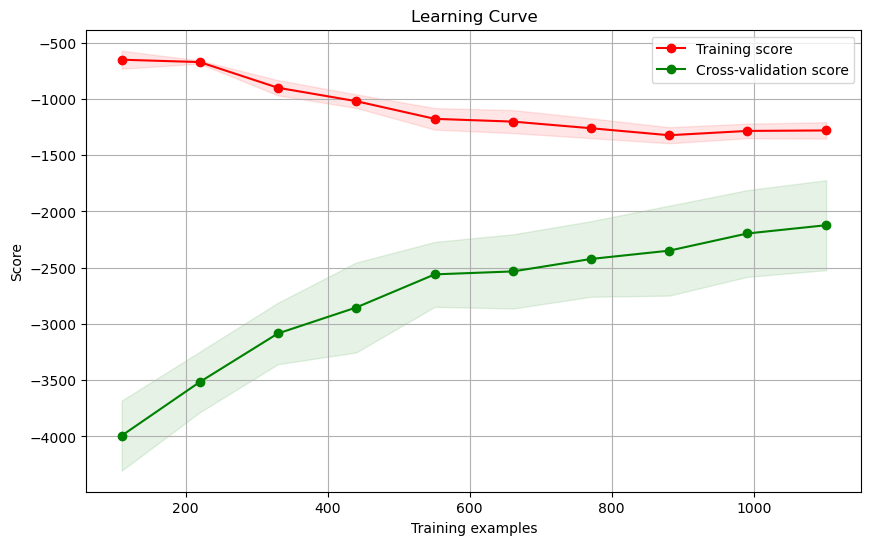

In [307]:
plot_learning_curve(selected_model, X_processed[selected_features], y,train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error') 

In [362]:
# Liste des modèles avec leurs noms et leurs classes
models = [
    {'name': 'Random Forest Regressor', 'model': RandomForestRegressor()}
]

# Hyperparamètres à tester pour la recherche en grille
params = {
    'n_estimators': [70, 80, 90, 100],
    'min_samples_split': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Préparer un DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['Model', 'R²', 'RMSE', 'MAE'])

for model_info in models:
    model = model_info['model']
    name = model_info['name']

    # Effectuer la recherche en grille pour chaque modèle
    processed_RFR = GridSearchCV(model, param_grid=params, cv=5, verbose=4, refit=True, scoring='r2')
    processed_RFR.fit(X_train[selected_features], y_train)
    best_model = processed_RFR.best_estimator_

    # Effectuer la validation croisée pour le meilleur modèle
    cv_scores = cross_val_score(best_model, X_train[selected_features], y_train, cv=5, scoring='r2')
    r2_cv = cv_scores.mean()

    # Calculer le R², RMSE et MAE pour le meilleur modèle
    best_model.fit(X_train[selected_features], y_train)
    y_pred = best_model.predict(X_test[selected_features])
    r2 = best_model.score(X_test[selected_features], y_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Enregistrer les résultats dans le DataFrame
    results_df = results_df.append({'Model': name, 'R²': r2, 'RMSE': rmse, 'MAE': mae}, ignore_index=True)

    print(f"{name} - R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f} (CV R²: {r2_cv:.4f})")

# Afficher le tableau de comparaison
print("\nTableau de comparaison des modèles :")
print(results_df)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=70;, score=0.688 total time=   0.1s
[CV 2/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=70;, score=0.618 total time=   0.1s
[CV 3/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=70;, score=0.656 total time=   0.1s
[CV 4/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=70;, score=0.626 total time=   0.1s
[CV 5/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=70;, score=0.593 total time=   0.1s
[CV 1/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=80;, score=0.679 total time=   0.1s
[CV 2/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=80;, score=0.603 total time=   0.1s
[CV 3/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=80;, score=0.675 total time=   0.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=80;, score=0.621 total time=   0.1s
[CV 5/5] E

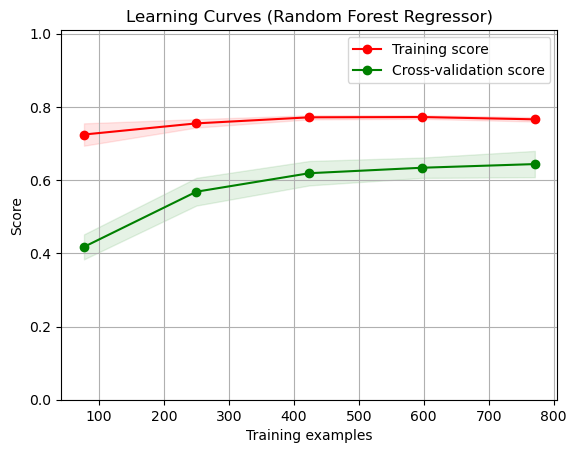

In [363]:
# Modèle choisi (meilleur modèle issu de la recherche en grille)
best_model = processed_RFR.best_estimator_

# Fonction pour tracer la courbe d'apprentissage
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest Regressor)"
plot_learning_curve(best_model, title, X_train[selected_features], y_train, ylim=(0.0, 1.01), cv=5, n_jobs=-1)

plt.show()


In [357]:
params = {
    'n_estimators' : [70,80,90,100],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

processed_RFR = GridSearchCV(selected_model, param_grid=params, cv=5, verbose=4,refit=True, scoring='r2')

In [358]:
processed_RFR.fit(X_train[selected_features], y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=70;, score=0.687 total time=   0.1s
[CV 2/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=70;, score=0.623 total time=   0.1s
[CV 3/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=70;, score=0.664 total time=   0.1s
[CV 4/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=70;, score=0.622 total time=   0.1s
[CV 5/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=70;, score=0.599 total time=   0.1s
[CV 1/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=80;, score=0.689 total time=   0.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=80;, score=0.613 total time=   0.1s
[CV 3/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=80;, score=0.671 total time=   0.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=1, n_estimators=80;, score=0.619 total time=   0.2s
[CV 5/5] E

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [70, 80, 90, 100]},
             scoring='r2', verbose=4)

In [359]:
processed_RFR.score(X_test[selected_features], y_test)

0.6660237700452881

In [360]:
processed_RFR.best_score_

0.6475107621427526

In [342]:
processed_RFR.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 90}

In [313]:
modt = RandomForestRegressor(max_depth= None, min_samples_leaf= 4,min_samples_split= 2, n_estimators= 100) 

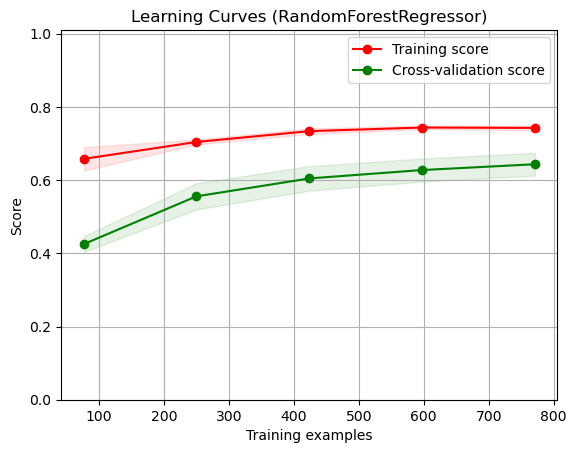

In [411]:
title = "Learning Curves (RandomForestRegressor)"
plot_learning_curve(modt, title, X_train[selected_features], y_train, ylim=(0.0, 1.01), cv=5, n_jobs=-1)

plt.show() 


**Our learning curves do not appear to be very satisfactory. The Random Forest Regressor may no longer be the best model after feature modifications.**

In [412]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR

# Liste des modèles avec leurs noms et leurs classes
models = [
    {'name': 'Random Forest Regressor', 'model': RandomForestRegressor(),
     'params': {
         'n_estimators': [70, 80, 90, 100],
         'min_samples_split': [2, 4, 6],
         'min_samples_leaf': [1, 2, 4]
     }},
    {'name': 'Gradient Boosting Regressor', 'model': GradientBoostingRegressor(),
     'params': {
         'n_estimators': [70, 80, 90, 100],
         'learning_rate': [0.01, 0.1, 0.2],
         'max_depth': [3, 4, 5]
     }},
    {'name': 'Linear Regression', 'model': LinearRegression(),
     'params': {}},
    {'name': 'Ridge', 'model': Ridge(),
     'params': {
         'alpha': [0.01, 0.1, 1, 10]
     }},
    {'name': 'Lasso', 'model': Lasso(),
     'params': {
         'alpha': [0.01, 0.1, 1, 10]
     }},
    {'name': 'Support Vector Regressor', 'model': SVR(),
     'params': {
         'C': [0.1, 1, 10],
         'kernel': ['linear', 'rbf']
     }}
]

# Préparer un DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['Model', 'R²', 'RMSE', 'MAE'])

for model_info in models:
    model = model_info['model']
    name = model_info['name']
    params = model_info['params']

    # Effectuer la recherche en grille pour chaque modèle
    model_grid = GridSearchCV(model, param_grid=params, cv=5, verbose=4, refit=True, scoring='r2')
    model_grid.fit(X_train[selected_features], y_train)
    best_model = model_grid.best_estimator_

    # Effectuer la validation croisée pour le meilleur modèle
    cv_scores = cross_val_score(best_model, X_train[selected_features], y_train, cv=5, scoring='r2')
    r2_cv = cv_scores.mean()

    # Calculer le R², RMSE et MAE pour le meilleur modèle
    best_model.fit(X_train[selected_features], y_train)
    y_pred = best_model.predict(X_test[selected_features])
    r2 = best_model.score(X_test[selected_features], y_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Enregistrer les résultats dans le DataFrame
    results_df = results_df.append({'Model': name, 'R²': r2, 'RMSE': rmse, 'MAE': mae}, ignore_index=True)

    print(f"{name} - R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f} (CV R²: {r2_cv:.4f})")

# Afficher le tableau de comparaison
print("\nTableau de comparaison des modèles :")
print(results_df)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.682 total time=   0.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.612 total time=   0.2s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.661 total time=   0.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.613 total time=   0.2s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.584 total time=   0.2s
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.685 total time=   0.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.659 total time=   0.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.611 total time=   0.2s
[CV 5/5] EN

It appears that the Gradient Boosting Regressor offers a better R² to RMSE ratio.

In [398]:
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)

In [399]:
model.fit(X_train[selected_features], y_train)

GradientBoostingRegressor(max_depth=5)

In [400]:
model.score(X_test[selected_features], y_test)

0.702023436375359

In [401]:
y_pred = model.predict(X_test[selected_features])

In [402]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

48.33634780818489

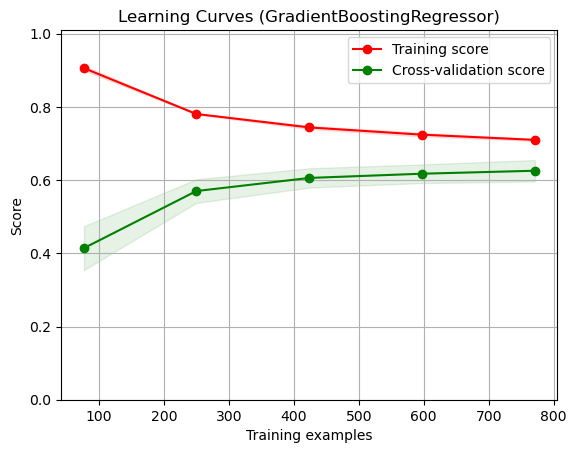

In [409]:
title = "Learning Curves (GradientBoostingRegressor)"
plot_learning_curve(model, title, X_train[selected_features], y_train, ylim=(0.0, 1.01), cv=5, n_jobs=-1)

plt.show()

**We obtain a model with an R² > 0.70 and an RMSE of 48.34. Furthermore, the learning curve does not exhibit overfitting unlike the random forest regressor. To enhance this model, increasing the dataset size as well as incorporating more information seems to be the most promising approach.**

**However, considering the scores of the metrics, we can deem this model acceptable.**

**Thanks for reading !**